In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Load Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/감정데이터분석/train.csv', index_col=None) # Train
test = pd.read_csv('/content/drive/MyDrive/감정데이터분석/test.csv', index_col=None) # Test
submission = pd.read_csv('/content/drive/MyDrive/감정데이터분석/sample_submission.csv') # Submission

In [ ]:
train

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
9987,TRAIN_9987,Yeah.,All,1038,neutral


In [ ]:
test

,ID,Utterance,Speaker,Dialogue_ID
0,TEST_0000,Why do all the coffee cups have figures below?,Mark,0
1,TEST_0001,"Oh. It's so Monica can follow. Of this way, if...",Rachell,0
2,TEST_0002,You know what?,Rachell,0
3,TEST_0003,"Come on, Lydia, you can do it.",Joeyy,1
4,TEST_0004,To push!,Joeyy,1
...,...,...,...,...
2605,TEST_2605,"Yeah, I mean, go Ross, no one will even notice...",Rachell,279
2606,TEST_2606,They don't listen to me?,Rossi,279
2607,TEST_2607,"Of course, they listen to you! Everyone listen...",Rachell,279
2608,TEST_2608,"Monica, do you really think I should try this ...",Rossi,279


#target 정수화

In [ ]:
for i in range(len(train['Target']. unique())):
  train.loc[train['Target']==train['Target'].unique()[i],'Target']= i
  i+=1
train

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,0
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,0
2,TRAIN_0002,That I did. That I did.,Chandler,0,0
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,0
4,TRAIN_0004,My duties? All right.,Chandler,0,1
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,0
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,0
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,1
9987,TRAIN_9987,Yeah.,All,1038,0


##Data 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


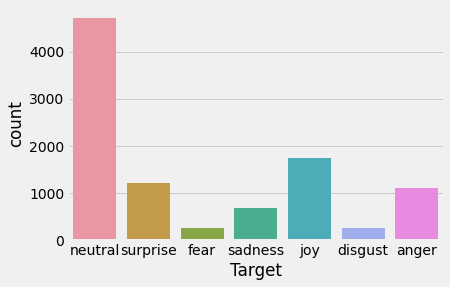

In [ ]:
#Target 변수 개수 시각화
sns.countplot(train['Target'])
plt.show()

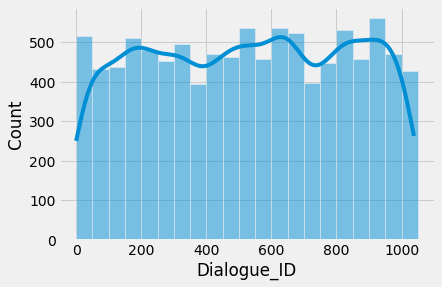

In [ ]:
#Dialogue_ID 
ax=sns.histplot(data=train, x='Dialogue_ID', binwidth=50, kde = True)
# plt.show()

In [ ]:
#가장 많은 단어 빈도수
ut_word = train['Utterance'].value_counts()[:10].to_frame().reset_index()
ut_word

,index,Utterance
0,Hey!,79
1,Okay.,64
2,What?,63
3,Yeah.,47
4,No.,37
5,What?!,36
6,Hey.,34
7,Really?,31
8,Hi.,29
9,Yeah!,27


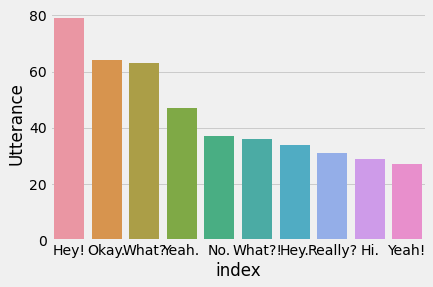

In [ ]:
#가장 많은 단어 빈도수 시각화
sns.barplot(data = ut_word, x=ut_word['index'], y=ut_word['Utterance'])

In [ ]:
df_train = train.copy()
df_test = test.copy()

df_train['Dialogue_ID'] = df_train['Dialogue_ID'].astype('category')
df_test['Dialogue_ID'] = df_train['Dialogue_ID'].astype('category')

In [ ]:
m_train = df_train.drop('ID',axis=1)
m_test = df_test.drop('ID',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

#Data 전처리 - 토큰화

In [ ]:
#train 
sentences=list(train.iloc[:,1])
vocab = {}
X_train = []
stop_words = set(stopwords.words('english'))
for sentence in sentences:
 # 단어 토큰화
 tokenized_sentence = word_tokenize(sentence)
 result = []
 for word in tokenized_sentence:
  word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
  if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
    if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
      result.append(word)
      if word not in vocab:
        vocab[word] = 0
      vocab[word] += 1
 X_train.append(result)
print(X_train)

[['also', 'point', 'person', 'company', 'transition', 'kl-5', 'gr-6', 'system'], ['must', 'hands', 'full'], [], ['let', 'talk', 'little', 'bit', 'duties'], ['duties', 'right'], ['heading', 'whole', 'division', 'lot', 'duties'], ['see'], ['perhaps', 'people', 'dump', 'certain', 'amount'], ['good', 'know'], ['detail'], ['beg'], ['right', 'definite', 'answer', 'monday', 'think', 'say', 'confidence', 'fit', 'well'], ['really'], ['absolutely', 'relax'], ['waitress', 'went', 'last', 'month'], ['know', 'forget'], ['no-no-no-no', 'talking'], ['i-i-i-i', "n't", 'actually', "n't", 'know'], [], ['right', 'well', '...'], ['yeah', 'sure'], ['hey', 'mon'], ['hey-hey-hey', 'wan', 'hear', 'something', 'sucks'], ['ever'], ['chris', 'says', 'closing', 'bar'], ['way'], ['yeah', 'apparently', 'turning', 'kinda', 'coffee', 'place'], ['coffee', 'gon', 'hang'], ['got'], ['get', 'beer'], ['hey', 'pick', 'roommate'], ['betcha'], ['italian', 'guy'], ['um-mm', 'yeah', 'right'], ['god', 'god', 'poor', 'monica'], 

In [ ]:
#train 
sentences=list(train.iloc[:,2])
vocab = {}
X_train1 = []
stop_words = set(stopwords.words('english'))
for sentence in sentences:
 # 단어 토큰화
 tokenized_sentence = word_tokenize(sentence)
 result = []
 for word in tokenized_sentence:
  word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
  if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
    if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
      result.append(word)
      if word not in vocab:
        vocab[word] = 0
      vocab[word] += 1
 X_train1.append(result)
print(X_train1)

[['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['chandler'], ['interviewer'], ['joey'], ['rachel'], ['joey'], ['rachel'], ['joey'], ['joey'], ['rachel'], ['chandler'], ['monica'], ['chandler'], ['monica'], ['chandler'], ['monica'], ['chandler'], ['monica'], ['chandler'], ['monica'], ['chandler'], ['monica'], ['chandler'], ['phoebe'], ['chandler'], ['phoebe'], ['phoebe'], ['phoebe'], ['phoebe'], ['phoebe'], ['phoebe'], ['joey'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['ross'], ['rachel'], ['phoebe'], ['joey'], ['phoebe'], ['sergei'], ['chandler'], ['joey'], ['chandler'], ['joey'], ['chandler'], ['joey'], ['chandler'], ['joey'], ['chandler'], ['joey'], ['joey'], ['joey'], ['joey'], ['joey'], ['chandler'], ['chandler'], ['chandler'], ['chandler'], 

In [ ]:
#test
sentences=list(test.iloc[:,1])
vocab = {}
X_test = []
stop_words = set(stopwords.words('english'))
for sentence in sentences:
 # 단어 토큰화
 tokenized_sentence = word_tokenize(sentence)
 result = []
 for word in tokenized_sentence:
  word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
  if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
    if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
      result.append(word)
      if word not in vocab:
        vocab[word] = 0
      vocab[word] += 1
 X_test.append(result)
print(X_test)

[['coffee', 'cups', 'figures'], ['monica', 'follow', 'way', 'one', 'missing', 'say', 'number'], ['know'], ['come', 'lydia'], ['push'], ['push', 'push', 'harder', 'harder'], ['push', 'push', 'far'], ['let', 'take', 'ball', 'really', 'move', 'hey', 'hey'], ['let', 'give', 'right', 'yeah'], ['push'], ['push'], [], ['ross', "n't", 'say', 'elevator'], ['yes', "n't", 'let'], ['okay', 'left', 'left', 'left'], ['okay', 'know', 'longer', 'left'], ['okay', 'lift', 'directly', 'head'], ['straight', 'head'], [], [], [], ['got'], ['okay', 'understand'], ['waiting', 'look', 'sorry', 'never', 'even'], ['howard'], ['yes', 'also', 'guy'], ['okay', 'well', 'matter', 'bienvenue', 'building'], ['ugh', 'believe', 'guy'], ['yeah', 'really', 'like', 'glasses'], ['ohh'], ['quoi'], ['kicked', 'think', 'baby', 'launched'], ['god'], ['wait', 'elastic', 'underwear', 'broken'], ['god', 'slept', 'much', 'supposed', 'set', 'half', 'hour', 'ago', 'get'], ['wait', 'joey', "n't", 'like'], ['look', 'know', 'feel', 'slee

In [ ]:
#test
sentences=list(test.iloc[:,2])
vocab = {}
X_test1 = []
stop_words = set(stopwords.words('english'))
for sentence in sentences:
 # 단어 토큰화
 tokenized_sentence = word_tokenize(sentence)
 result = []
 for word in tokenized_sentence:
  word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
  if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
    if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
      result.append(word)
      if word not in vocab:
        vocab[word] = 0
      vocab[word] += 1
 X_test1.append(result)
print(X_test1)

[['mark'], ['rachell'], ['rachell'], ['joeyy'], ['joeyy'], ['joeyy'], ['joeyy'], ['joeyy'], ['joeyy'], ['joeyy'], ['joeyy'], ['rossi'], ['rachell'], ['rossi'], ['rossi'], ['rachell'], ['rossi'], ['rossi'], ['rossi'], ['rossi'], ['rossi'], ['rossi'], ['steve'], ['rossi'], ['steve'], ['rossi'], ['steve'], ['rossi'], ['phoebe'], ['phoebe'], ['mornica'], ['phoebe'], ['mornica'], ['phoebe'], ['joeyy'], ['mornica'], ['joeyy'], ['joeyy'], ['chadler'], ['chadler'], ['marjorie'], ['chadler'], ['marjorie'], ['chadler'], ['marjorie'], ['chadler'], ['joeyy'], ['joeyy'], ['mornica'], ['phoebe'], ['mornica'], ['phoebe'], ['joeyy'], ['chadler'], ['mornica'], ['rossi'], ['mornica'], ['rossi'], ['joeyy'], ['jade'], ['chadler'], ['jade'], ['rossi'], ['chadler'], ['chadler'], ['jade'], ['phoebe'], ['mornica'], ['fireman'], ['phoebe'], ['rachell'], ['joeyy'], ['fireman'], ['mornica'], ['joeyy'], ['phoebe'], ['chadler'], ['rachell'], ['mornica'], ['rachell'], ['fireman'], ['rachell'], ['mornica'], ['chadle

#정수인코딩

In [ ]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
tokenizer.fit_on_texts(X_train1)
X_train1 = tokenizer.texts_to_sequences(X_train1)
X_test1 = tokenizer.texts_to_sequences(X_test1)

In [ ]:
len(tokenizer.word_index)

5719

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5719
등장 빈도가 2번 이하인 희귀 단어의 수: 3884
단어 집합에서 희귀 단어의 비율: 67.91397097394649
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.96404178812315


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1836


#패딩

In [ ]:
X_train = pad_sequences(X_train,maxlen = 30)
X_test = pad_sequences(X_test,maxlen = 30)
X_train1 = pad_sequences(X_train1,maxlen = 3)
X_test1 = pad_sequences(X_test1,maxlen = 3)

In [ ]:
t= X_train.copy()
f= X_train1.copy()

d = pd.DataFrame(t)
f = pd.DataFrame(f,columns = ['one','two','three'])

df = pd.concat([d,f], axis = 1)
df['Dialogue_ID']=train['Dialogue_ID']
df


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,one,two,three,Dialogue_ID
0,0,0,0,0,0,0,0,0,0,0,...,286,930,2552,2553,2554,699,0,0,6,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,231,518,624,0,0,630,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
3,0,0,0,0,0,0,0,0,0,0,...,0,28,85,40,314,1315,0,0,630,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1315,6,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,1038
9985,0,0,0,0,0,0,0,0,0,0,...,12,25,195,7,1610,5650,0,0,2,1038
9986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,2540,6,0,0,1,1038
9987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,1038


In [ ]:
t1= X_test.copy()
f1= X_test1.copy()

d1 = pd.DataFrame(t1)
f1 = pd.DataFrame(f1,columns = ['one','two','three'])

df1 = pd.concat([d1,f1], axis = 1)
df1['Dialogue_ID']=test['Dialogue_ID']
df1


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,one,two,three,Dialogue_ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,199,1169,0,0,156,0
1,0,0,0,0,0,0,0,0,0,0,...,828,66,16,3484,41,296,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,19,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2016,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,0,0,0,0,0,0,0,0,0,0,...,1178,17,175,7,77,63,0,0,0,279
2606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,63,0,0,0,279
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,184,63,359,0,0,0,279
2608,0,0,0,0,0,0,0,0,0,0,...,0,45,11,14,158,53,0,0,0,279


#학습

In [ ]:
y_train = np.array(train['Target'])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 4], dtype=object)

#modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.4 MB/s 
     |████████████████████████████████| 7.6 MB 45.0 MB/s 
     |████████████████████████████████| 182 kB 58.5 MB/s 


#pipeline

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:92: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,


In [ ]:
list(train['Utterance'])

['also I was the point person on my company’s transition from the KL-5 to GR-6 system.',
 'You must’ve had your hands full.',
 'That I did. That I did.',
 'So let’s talk a little bit about your duties.',
 'My duties?  All right.',
 'Now you’ll be heading a whole division, so you’ll have a lot of duties.',
 'I see.',
 'But there’ll be perhaps 30 people under you so you can dump a certain amount on them.',
 'Good to know.',
 'We can go into detail',
 'No don’t I beg of you!',
 'All right then, we’ll have a definite answer for you on Monday, but I think I can say with some confidence, you’ll fit in well here.',
 'Really?!',
 'Absolutely.  You can relax',
 'But then who? The waitress I went out with last month?',
 'You know? Forget it!',
 'No-no-no-no, no! Who, who were you talking about?',
 "No, I-I-I-I don't, I actually don't know",
 'Ok!',
 'All right, well...',
 'Yeah, sure!',
 'Hey, Mon.',
 'Hey-hey-hey. You wanna hear something that sucks.',
 'Do I ever.',
 'Chris says they’re closin

In [ ]:
df_t = train.applymap(str)

In [ ]:
df_t

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
9987,TRAIN_9987,Yeah.,All,1038,neutral


In [ ]:
check = classifier(list(train['Utterance']))

In [ ]:
check

[[{'label': 'anger', 'score': 0.0041732569225132465},
  {'label': 'disgust', 'score': 0.003544819774106145},
  {'label': 'fear', 'score': 0.0048845624551177025},
  {'label': 'joy', 'score': 0.009135264903306961},
  {'label': 'neutral', 'score': 0.9108974933624268},
  {'label': 'sadness', 'score': 0.0159449502825737},
  {'label': 'surprise', 'score': 0.05141957849264145}],
 [{'label': 'anger', 'score': 0.020157717168331146},
  {'label': 'disgust', 'score': 0.023278051987290382},
  {'label': 'fear', 'score': 0.004426360130310059},
  {'label': 'joy', 'score': 0.004526342265307903},
  {'label': 'neutral', 'score': 0.9059222340583801},
  {'label': 'sadness', 'score': 0.01234421506524086},
  {'label': 'surprise', 'score': 0.02934505045413971}],
 [{'label': 'anger', 'score': 0.07265438139438629},
  {'label': 'disgust', 'score': 0.02988998405635357},
  {'label': 'fear', 'score': 0.005866610445082188},
  {'label': 'joy', 'score': 0.014910646714270115},
  {'label': 'neutral', 'score': 0.85230576

In [ ]:
len(check)

9989

In [ ]:
check[1]
for i in range(len(check)):
  check[i]['score']

[{'label': 'anger', 'score': 0.020157717168331146},
 {'label': 'disgust', 'score': 0.023278051987290382},
 {'label': 'fear', 'score': 0.004426360130310059},
 {'label': 'joy', 'score': 0.004526342265307903},
 {'label': 'neutral', 'score': 0.9059222340583801},
 {'label': 'sadness', 'score': 0.01234421506524086},
 {'label': 'surprise', 'score': 0.02934505045413971}]

In [ ]:
for i in range(len(check)):
  score=[]
  for j in range(len(check[i])):
    score.append(check[i][j]['score'])
    score
  predict=np.argmax(score)
  print(check[i][predict]['label'])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
neutral
fear
neutral
surprise
sadness
surprise
surprise
surprise
neutral
neutral
fear
sadness
neutral
neutral
neutral
anger
anger
joy
neutral
surprise
joy
surprise
fear
neutral
neutral
neutral
anger
fear
anger
anger
disgust
surprise
surprise
neutral
surprise
neutral
disgust
neutral
neutral
sadness
sadness
neutral
joy
neutral
anger
neutral
neutral
neutral
joy
anger
surprise
neutral
anger
neutral
neutral
surprise
neutral
disgust
neutral
neutral
surprise
neutral
surprise
surprise
joy
anger
anger
disgust
surprise
neutral
neutral
joy
neutral
surprise
neutral
neutral
anger
neutral
disgust
surprise
joy
joy
surprise
surprise
anger
disgust
surprise
surprise
surprise
surprise
joy
surprise
sadness
sadness
surprise
disgust
disgust
fear
joy
neutral
neutral
surprise
neutral
joy
joy
anger
joy
joy
joy
surprise
joy
neutral
neutral
disgust
disgust
disgust
neutral
joy
surprise
anger
surprise
surprise
joy
neutral
surprise
anger
surprise
anger
neutral
surprise
neutral
su

####test

In [ ]:
check_t = classifier(list(test['Utterance']))

In [ ]:
for i in range(len(check_t)):
  score=[]
  for j in range(len(check_t[i])):
    score.append(check_t[i][j]['score'])
  predict=np.argmax(score)
  submission['Target'][i]=check_t[i][predict]['label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
submission

,ID,Target
0,TEST_0000,surprise
1,TEST_0001,neutral
2,TEST_0002,surprise
3,TEST_0003,neutral
4,TEST_0004,anger
...,...,...
2605,TEST_2605,disgust
2606,TEST_2606,anger
2607,TEST_2607,anger
2608,TEST_2608,surprise


In [ ]:
submission.to_csv('./submission77.csv',index=False)

#여까지

In [ ]:
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
# from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dt = DecisionTreeClassifier()
param = {
    'max_depth':range(1, 21),
    'max_leaf_nodes':range(5, 101, 5),
    'criterion':['entropy','gini']
}
n_iter = 80

rs = RandomizedSearchCV(dt,
                        param_distributions=param,
                        n_iter=n_iter, 
                        cv=5, 
                        n_jobs=-1)
rs.fit(df, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 203, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multi

ValueError: ignored

In [ ]:
ipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=2)
)
dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)
clf.fit(X_train, y_train);
print('최적 하이퍼파라미터: ', clf.best_params_)

In [ ]:
#가장 좋은 모델을 찾는 class
RandomizedSearchCV()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
XGB_params = { 
    'learning_rate' : [0.1],
    'n_estimators' : [100],
    'max_depth' : [5],
    'min_child_weight' : [0.001],
    'subsample' : [0.8],
    'colsample_bytree' : [0.8],
    'gamma' : [0]
}

XGB_model = XGBClassifier()
grid_XGB = GridSearchCV(XGB_model, param_grid=XGB_params, cv=2, n_jobs=-1)
grid_XGB.fit(x_train, y_train)

print('XGBoost 최적의 하이퍼 파라미터:', grid_XGB.best_params_)
print('XGBoost 최적의 예측 정확도: {0:.4f}'.format(grid_XGB.best_score_))

XGBoost 최적의 하이퍼 파라미터: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.001, 'n_estimators': 100, 'subsample': 0.8}
XGBoost 최적의 예측 정확도: 0.4724


In [ ]:
RF_params = { 
    'n_estimators' : [10, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

RF_model = RandomForestClassifier()
grid_RF = GridSearchCV(RF_model, param_grid=RF_params, cv=2, n_jobs=-1)
grid_RF.fit(df, y_train)

print('RFoost 최적의 하이퍼 파라미터:', grid_RF.best_params_)
print('RFoost 최적의 예측 정확도: {0:.4f}'.format(grid_RF.best_score_))

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

RFoost 최적의 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 20, 'n_estimators': 10}
RFoost 최적의 예측 정확도: 0.4059


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
RF_model = RandomForestClassifier(max_depth=8, min_samples_leaf=18, min_samples_split=20,n_estimators=10)
RF_model.fit(df, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=8, min_samples_leaf=18, min_samples_split=20,
                       n_estimators=10)

In [ ]:
predict = RF_model.predict(df1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
len(predict)

2610

#submission

In [ ]:
submission['Target'] = predict

In [ ]:
submission

,ID,Target
0,TEST_0000,neutral
1,TEST_0001,neutral
2,TEST_0002,neutral
3,TEST_0003,neutral
4,TEST_0004,neutral
...,...,...
2605,TEST_2605,neutral
2606,TEST_2606,neutral
2607,TEST_2607,neutral
2608,TEST_2608,neutral


In [ ]:
submission.to_csv('./sunwoo_submission.csv',index=False)

##----

In [ ]:
# model = svm
model = svm.SVC(gamma = 'scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('svm.SVC: %.2f' %(metrics.accuracy_score(y_pred, y_test)*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


svm.SVC: 48.08


In [ ]:
# model = DecisionTree

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %2f' %(metrics.accuracy_score(y_pred, y_test)*100))

DecisionTreeClassifier: 34.034034


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# model = KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %2f' %(metrics.accuracy_score(y_pred, y_test)*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier: 37.137137


In [ ]:
# model = LogisticRegression

model = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %2f' %(metrics.accuracy_score(y_pred, y_test)*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression: 47.781114


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# model = RandomForest
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier: 45.65


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 가설

###가설1. ?가 들어가면 감정은 'surprise' 일 것이다.
###가설2. Hey가 들어가면 감정은 'joy' 일 것이다.


In [ ]:
train['Dialogue_ID'].unique()

array([   0,    1,    2, ..., 1036, 1037, 1038])

In [ ]:
train['Target'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

In [ ]:
train['Utterance']

0       also I was the point person on my company’s tr...
1                        You must’ve had your hands full.
2                                 That I did. That I did.
3           So let’s talk a little bit about your duties.
4                                  My duties?  All right.
                              ...                        
9984                                           You or me?
9985    I got it. Uh, Joey, women don't have Adam's ap...
9986                 You guys are messing with me, right?
9987                                                Yeah.
9988    That was a good one. For a second there, I was...
Name: Utterance, Length: 9989, dtype: object

In [ ]:
# d1=train['Utterance']
# d1.str.contains('?')
train[train['Utterance'].str.contains('?')]

error: ignored

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

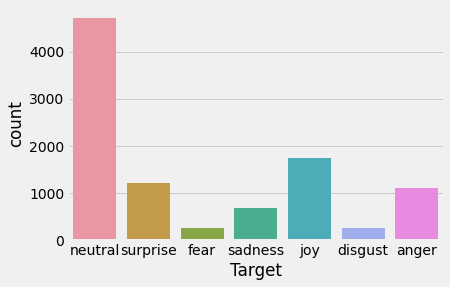

In [ ]:
#Target 개수
sns.countplot(x="Target", data=train)

##Hey
joy = 131
neutral = 223
surprise = 45
fear = 3
disgust = 3
anger = 40

In [ ]:
train[train['Target']=='joy']

,ID,Utterance,Speaker,Dialogue_ID,Target
23,TRAIN_0023,Do I ever.,Chandler,2,joy
31,TRAIN_0031,You betcha!,Chandler,2,joy
33,TRAIN_0033,"Um-mm, yeah right!",Chandler,2,joy
44,TRAIN_0044,Hi!,Ross,4,joy
51,TRAIN_0051,"Oh well, the woman I interviewed with was pret...",Rachel,4,joy
...,...,...,...,...,...
9938,TRAIN_9938,Hey!,Ross,1034,joy
9946,TRAIN_9946,Yes! Shame about you man.,Joey,1035,joy
9947,TRAIN_9947,Hey-hey! Stanley! Hey-hey! You're leading man ...,Joey,1036,joy
9972,TRAIN_9972,Hey!,All,1038,joy


In [ ]:
df1 = train.copy()
df1 = df1.set_index(keys='ID')
df1
# df1.groupby('Dialogue_ID')


,Utterance,Speaker,Dialogue_ID,Target
ID,,,,
TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
TRAIN_0002,That I did. That I did.,Chandler,0,neutral
TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...
TRAIN_9984,You or me?,Chandler,1038,neutral
TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
